# ノンパラメトリック検定（Mann-Whitney検定）

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats #統計に関するライブラリ
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/04.csv")
df.head()

,A,B
0,1.83,0.88
1,1.50,0.65
2,1.62,0.60
3,4.55,1.05
4,1.68,1.06


In [3]:
df.describe()

,A,B
count,11.000000,9.000000
mean,2.371818,1.113333
std,1.304230,0.455357
min,1.300000,0.600000
25%,1.585000,0.880000
50%,1.830000,1.060000
75%,2.535000,1.290000
max,5.110000,2.140000


In [4]:
A = df.A
A

0     1.83
1     1.50
2     1.62
3     4.55
4     1.68
5     1.88
6     1.55
7     3.06
8     1.30
9     2.01
10    5.11
Name: A, dtype: float64

In [5]:
df.B

0     0.88
1     0.65
2     0.60
3     1.05
4     1.06
5     1.29
6     1.06
7     2.14
8     1.29
9      NaN
10     NaN
Name: B, dtype: float64

In [6]:
B = df.B.iloc[0:9]
B

0    0.88
1    0.65
2    0.60
3    1.05
4    1.06
5    1.29
6    1.06
7    2.14
8    1.29
Name: B, dtype: float64

## 正規性検定

(array([1., 2., 2., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1.3  , 1.427, 1.554, 1.681, 1.808, 1.935, 2.062, 2.189, 2.316,
        2.443, 2.57 , 2.697, 2.824, 2.951, 3.078, 3.205, 3.332, 3.459,
        3.586, 3.713, 3.84 , 3.967, 4.094, 4.221, 4.348, 4.475, 4.602,
        4.729, 4.856, 4.983, 5.11 ]),
 <a list of 30 Patch objects>)

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


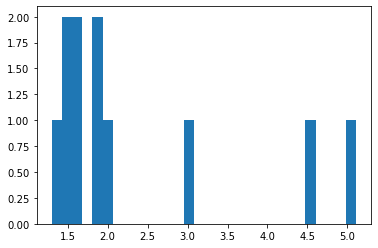

In [7]:
plt.hist(A, bins=30)

((array([-1.54586084, -1.04486694, -0.7191259 , -0.45648364, -0.2223761 ,
          0.        ,  0.2223761 ,  0.45648364,  0.7191259 ,  1.04486694,
          1.54586084]),
  array([1.3 , 1.5 , 1.55, 1.62, 1.68, 1.83, 1.88, 2.01, 3.06, 4.55, 5.11])),
 (1.2199217872993453, 2.3718181818181816, 0.8630066038156478))

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


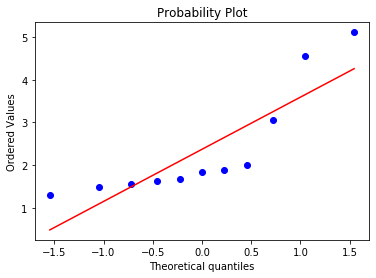

In [8]:
stats.probplot(A, dist="norm", plot=plt)

(array([2., 0., 0., 0., 0., 1., 0., 0., 3., 0., 0., 0., 0., 2., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.6       , 0.65133333, 0.70266667, 0.754     , 0.80533333,
        0.85666667, 0.908     , 0.95933333, 1.01066667, 1.062     ,
        1.11333333, 1.16466667, 1.216     , 1.26733333, 1.31866667,
        1.37      , 1.42133333, 1.47266667, 1.524     , 1.57533333,
        1.62666667, 1.678     , 1.72933333, 1.78066667, 1.832     ,
        1.88333333, 1.93466667, 1.986     , 2.03733333, 2.08866667,
        2.14      ]),
 <a list of 30 Patch objects>)

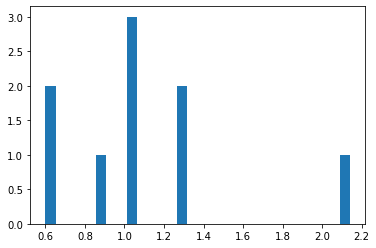

In [9]:
plt.hist(B, bins=30)

((array([-1.44573845, -0.91666807, -0.56381839, -0.2709378 ,  0.        ,
          0.2709378 ,  0.56381839,  0.91666807,  1.44573845]),
  array([0.6 , 0.65, 0.88, 1.05, 1.06, 1.06, 1.29, 1.29, 2.14])),
 (0.45864232111970227, 1.1133333333333335, 0.9178565889937856))

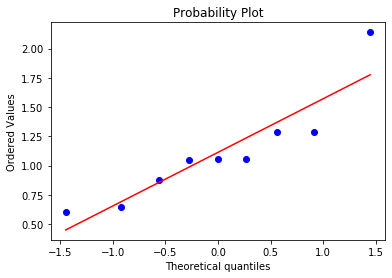

In [10]:
stats.probplot(B, dist="norm", plot=plt)

## 正規性を検定する (シャピロウィルク検定)

In [11]:
stats.shapiro(A)

(0.7433371543884277, 0.001701830537058413)

Aは正規性が棄却された → 正規分布でない

In [12]:
stats.shapiro(B)

(0.8627253770828247, 0.10264518857002258)

Bは正規分布

A, B 双方が正規分布ではないので、ノンパラメトリック検定を行う。

## F検定

In [13]:
def F_test(A, B):
    A_var = np.var(A, ddof=1)  # Aの不偏分散
    B_var = np.var(B, ddof=1)  # Bの不偏分散
    A_df = len(df.A) - 1  # Aの自由度
    B_df = len(df.B) - 1  # Bの自由度
    f = A_var / B_var  # F比の値
    one_sided_pval1 = stats.f.cdf(f, A_df, B_df)  # 片側検定のp値 1
    one_sided_pval2 = stats.f.sf(f, A_df, B_df)   # 片側検定のp値 2
    two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値

    print('F-value:       ', round(f, 5))
    print('p-value(2 sides): ', round(two_sided_pval, 5))

In [14]:
F_test(A, B)

F-value:        8.2036
p-value(2 sides):  0.00262


F検定で分散に差があることが判明した。

## Mann-Whitney検定

In [18]:
stats.mannwhitneyu(A, B) # ディフォルトは片側検定

MannwhitneyuResult(statistic=8.0, pvalue=0.0009126805049965518)

In [20]:
stats.mannwhitneyu(A, B, alternative='two-sided') # 両側検定を指定

MannwhitneyuResult(statistic=91.0, pvalue=0.0018253610099931035)

## scipy.stats.mannwhitneyu(x, y, use_continuity=True)
Computes the Mann-Whitney rank test on samples x and y.

Parameters:	
x, y : array_like

Array of samples, should be one-dimensional.

use_continuity : bool, optional

Whether a continuity correction (1/2.) should be taken into account. Default is True.

Returns:	
u : float The Mann-Whitney statistics.

prob : float One-sided p-value assuming a asymptotic normal distribution.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind

返り値：

U値 ： Mann-WhitneyのU値

p値（片側検定） ： ２群の点の配置（順序関係）には偏りがないという帰無仮説で検定を行った結果。この値でもって1%や5%の判定をする。